# 1. Python for Finance: Analyze Big Financial Data by Yves Hilpisch

#### Introduction

Those who want to immediately get started with a full-fledged, interactive financial
analytics environment for Python (and, for instance, R and Julia) should go to http://
oreilly.quant-platform.com (http://oreilly.quant-platform.com/) and try out the Python Quant Platform (in combination
with the IPython Notebook files and code that come with this book). You should also
have a look at DX analytics (http://dx-analytics.com/), a Python-based financial analytics library

##### Finance with Python

However, code that is meant to be reused regularly typically gets organized in so-called modules (or
scripts), which are single Python (i.e., text) files with the suffix .py

###### Try a Use Case

Consider a student who wants to analyze historical stock price information for, say, five years to see how the volatility of the stock price has fluctuated over time. She wants to find evidence that volatility, in contrast to some typical model assumptions, fluctuates over time and is far from being constant. The results should also be visualized. She mainly has to do the following:
- Download Google stock price data from the Web.
- Calculate the rolling standard deviation of the log returns (volatility).
- Plot the stock price data and the results.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127c3ba50>,
      dtype=object)

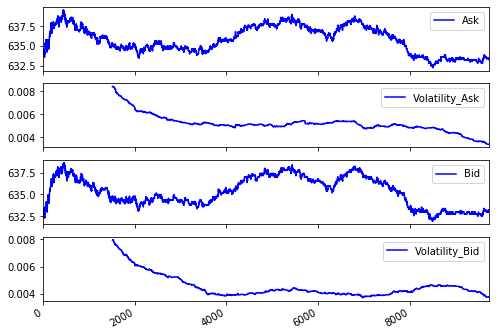

In [136]:
# Import packages
import numpy as np
import pandas as pd

# Import Data
bae = pd.read_csv("BA.GBGBX_Ticks_27.01.2020-27.01.2020.csv")

bae.tail()

# Analytics - Calculate the rolling standard deviation of the log returns (volatility)
bae['Log_Ret_Ask'] = np.log(bae['Ask'] / bae['Ask'].shift(1))
bae['Volatility_Ask'] = bae['Log_Ret_Ask'].rolling(1517).std() * np.sqrt(1517)

bae['Log_Ret_Bid'] = np.log(bae['Bid'] / bae['Bid'].shift(1))
bae['Volatility_Bid'] = bae['Log_Ret_Bid'].rolling(1517).std() * np.sqrt(1517)

# Plot Results 
%matplotlib inline
bae[['Ask', 'Volatility_Ask', 'Bid', 'Volatility_Bid']].plot(subplots=True, color='blue', figsize = (8,6))

It can be considered almost amazing that four lines of code suffice to implement three
rather complex tasks typically encountered in financial analytics: data gathering, com‐
plex and repeated mathematical calculations, and visualization of results

Further Reading
There are two books available that cover the use of Python in finance:
- Fletcher, Shayne and Christopher Gardner (2009): Financial Modelling in Python.
John Wiley & Sons, Chichester, England.
- Hilpisch, Yves (2015): Derivatives Analytics with Python. Wiley Finance, Chiches‐
ter, England. http://derivatives-analytics-with-python.com.

#### Monte Carlo Simulation
Monte Carlo simulation is one of the most important algorithms in finance and nu‐
merical science in general.

In comparison to other numerical methods, the Monte Carlo method can easily cope with high-dimensional
problems where the complexity and computational demand, respectively, generally in‐
crease in linear fashion. The downside of the Monte Carlo method is that it is per se computationally demanding
and often needs huge amounts of memory even for quite simple problems.

Vectorization brings a speedup of more than 30 times in comparison to pure Python

##### Technical Analysis 
In finance, technical analysis is a security analysis methodology for forecasting the di‐
rection of prices through the study of past market data, primarily price and volume.

The sublibrary pandas.io.data contains the function DataReader, which helps with
getting financial time series data from different sources and in particular from the pop‐
ular Yahoo! Finance site.

CAN GRAB SUPPLEMENTARY DATA FROM HERE IF NEEDED.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9727 entries, 0 to 9726
Data columns (total 9 columns):
Local time        9727 non-null object
Ask               9727 non-null float64
Bid               9727 non-null float64
AskVolume         9727 non-null float64
BidVolume         9727 non-null float64
Log_Ret_Ask       9726 non-null float64
Volatility_Ask    8210 non-null float64
Log_Ret_Bid       9726 non-null float64
Volatility_Bid    8210 non-null float64
dtypes: float64(8), object(1)
memory usage: 684.1+ KB


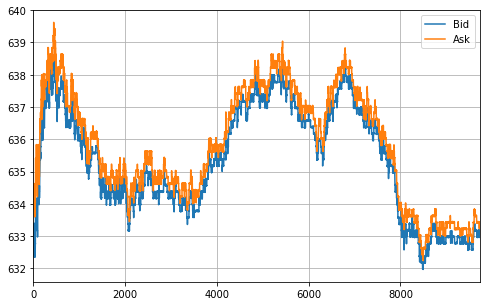

In [137]:
#import numpy as np
#import pandas as pd
#import pandas.io.data as web
#sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='4/14/2014')
#DataReader has connected to the data source via an Internet connection and has given
#back the time series data for the S&P 500 index, from the first trading day in 2000 until
#the end date. It has also generated automatically a time index with Timestamp objects.

bae.info()
bae[['Bid', 'Ask']].plot(grid=True, figsize=(8, 5))

The trend strategy we want to implement is based on both a two-month (i.e., 42 trading
days) and a one-year (i.e., 252 trading days) trend (i.e., the moving average of the index
level for the respective period)

30600000 miliseconds in a trading day

Generate the trend data:

Below we attempt to use miliseconds, but we'd probably in reality take an average of bid and ask (or high and low) and just do it daily. 

In [138]:
bae['Ask_trend'] = np.round(bae['Ask'].rolling(30600000, 2).mean())
bae['Bid_trend'] = np.round(bae['Bid'].rolling(30600000, 2).mean())
bae[['Ask', 'Bid', 'Ask_trend', 'Bid_trend']].tail()

,Ask,Bid,Ask_trend,Bid_trend
9722,633.430,632.976,636.0,635.0
9723,633.430,632.955,636.0,635.0
9724,633.433,633.000,636.0,635.0
9725,633.421,633.000,636.0,635.0
9726,633.400,632.970,636.0,635.0


Second, the plotting of the new data. The resulting plot in Figure 3-6 already provides
some insights into what was going on in the past with respect to upward and downward
trends:

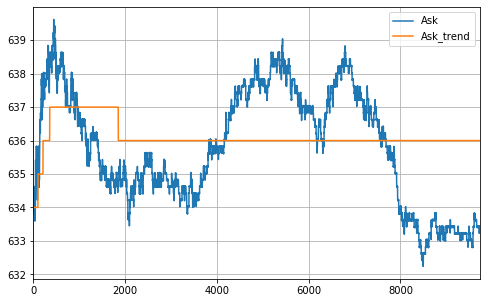

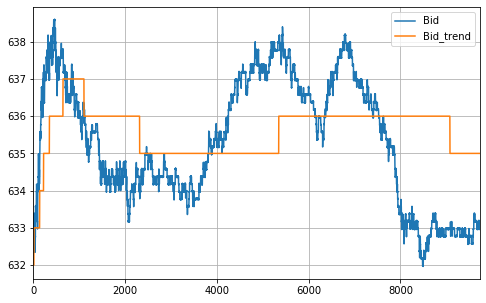

In [139]:
bae[['Ask', 'Ask_trend']].plot(grid=True, figsize=(8, 5))
bae[['Bid', 'Bid_trend']].plot(grid=True, figsize=(8, 5))

If we were using the Yahoo data:

Our basic data set is mainly complete, such that we now can devise a rule to generate
trading signals. The rule says the following:
- Buy signal (go long)
the 42d trend is for the first time SD points above the 252d trend.
- Wait (park in cash)
the 42d trend is within a range of +/– SD points around the 252d trend.
- Sell signal (go short)
the 42d trend is for the first time SD points below the 252d trend.

In [39]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

(-1.1, 1.1)

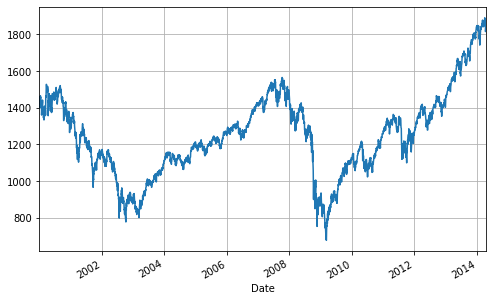

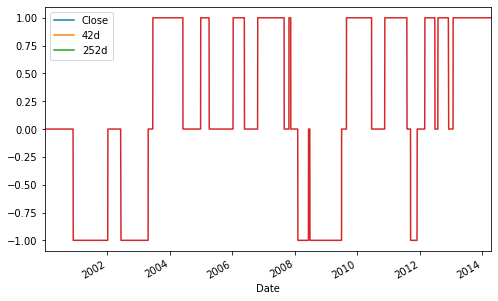

In [40]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='4/14/2014')
sp500['Close'].plot(grid=True, figsize=(8, 5))

sp500['42d'] = np.round(sp500['Close'].rolling(42,2).mean())
sp500['252d'] = np.round(sp500['Close'].rolling(252,2).mean())

sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

sp500['42-252'] = sp500['42d'] - sp500['252d']

#On the last available trading date the 42d trend lies well above the 252d trend. Although
#the number of entries in the two trend columns is not equal, pandas takes care of this
#by putting NaN values at the respective index positions

#To make it more formal, we again generate a new column for what we call a regime. We
#assume a value of 50 for the signal threshold:

SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

# In words, on 1,489 trading dates, the 42d trend lies more than SD points above the 252d trend. 
# On 1,232 days, the 42d trend is more than SD points below the 252d trend. 
#Obviously, if the short-term trend crosses the line of the long-term trend it tends to rest
# there for a (longer) while. This is what we call regime

sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

Everything is now available to test the investment strategy based on the signals. We
assume for simplicity that an investor can directly invest in the index or can directly
short the index, which in the real world must be accomplished by using index funds,
exchange-traded funds, or futures on the index, for example

Based on the respective regime, the investor either is long or short in the market (index)
or parks his wealth in cash, which does not bear any interest. The investor makes the market return when
he is long (1), makes the negative market returns when  In Python, we have the following vectorized pandas operation to calculate the log returnshe is short (–1), and makes no
returns (0) when he parks his wealth in cash.  In
Python, we have the following vectorized pandas operation to calculate the log returns

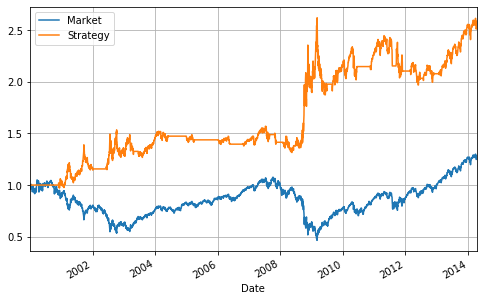

In [43]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

# Recalling how we constructed our regimes, it is now simple to get the returns of the
# trend-based trading strategy—we just have to multiply our Regime column, shifted by
# one day, by the Returns columns (the position is built “yesterday” and yields “today’s”
# returns)

sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

#The strategy pays off well; the investor is able to lock in a much higher return over the
#relevant period than a plain long investment would provide. Figure 3-8 compares the
#cumulative, continuous returns of the index with the cumulative, continuous returns of
#our strategy:

sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8, 5))

Figure 3-8 shows that especially during market downturns (2003 and 2008/2009) the
shorting of the market yields quite high returns. 

##### Random Python Things to Keep in Mind

- tuple
A collection of arbitrary objects; only a few methods available
- list
A collection of arbitrary objects; many methods available
- dict
A key-value store object
- set
An unordered collection object for other unique objects

However, scientific and financial ap‐
plications generally have a need for high-performing operations on special data struc‐
tures. One of the most important data structures in this regard is the array. Arrays
generally structure other (fundamental) objects in rows and columns.

Such a specialized class is numpy.ndarray, which has been built with the specific goal
of handling n-dimensional arrays both conveniently and efficiently—i.e., in a highly
performing manner.

In [46]:
import numpy as np
a = np.array([0, 0.5, 1.0, 1.5, 2.0])
type(a)
a[:2]

array([0. , 0.5])

Therefore, NumPy provides structured arrays that allow us to have different NumPy data
types per column, at least.

## Financial Time Series

Wes McKinney, the main author of pandas, started developing the library when working as an analyst at AQR
Capital Management, a large hedge fund. It is safe to say that pandas has been designed
from the ground up to work with financial time series. As this chapter demonstrates,
the main inspiration for the fundamental classes, such as the DataFrame and Series
classes, is drawn from the R statistical analysis language, which without doubt has a
strength in that kind of modeling and analysis.

High-frequency data: In recent years, available financial data has increasingly shifted from daily quotes
to tick data. Daily tick data volumes for

##### Indices matter with Pandas and financial TS data

As with the columns, we assign the newly generated DatetimeIndex as the new Index
object to the DataFrame object:

When it comes to the generation of DatetimeIndex objects with the help of the
date_range function, there are a number of choices for the frequency parameter freq

THIS INCLUDES MILLISECONDS!

#### Basically, pandas provides a wrapper around matplotplib (cf. Chapter 5), specifically designed for DataFrame objects.

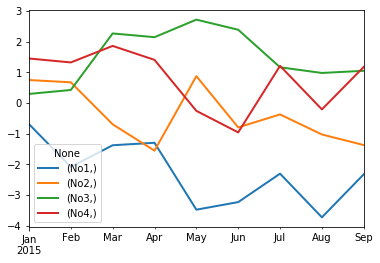

In [67]:
a = np.random.standard_normal((9, 4))
df = pd.DataFrame(a)
df.columns = [['No1', 'No2', 'No3', 'No4']]
dates = pd.date_range('2015-1-1', periods=9, freq='M')
df.index = dates
np.array(df).round(6)

# Do on the dataframe (Pandas DF)
%matplotlib inline
df.cumsum().plot(lw=2.0)

#### Looking at financial Data 

To get a better overview of the index’s history, a plot is again generated easily with the
plot method

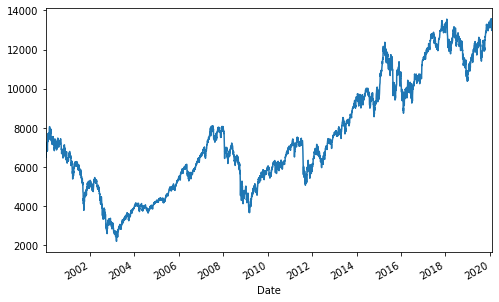

In [70]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',start='2000-1-1')
DAX['Close'].plot(figsize=(8, 5))

Take the log returns based on the daily closing prices as an example

 Adding a column with the respective information
could be achieved with the following code, which first generates a new, empty column
and then iterates over all indexes to calculate the single log return values step by step:

In [72]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] /DAX['Close'][i - 1])

CPU times: user 738 ms, sys: 6.89 ms, total: 745 ms
Wall time: 750 ms


Alternatively, you can use vectorized code to reach the same result without looping. To
this end, the shift method is useful; it shifts Series or whole DataFrame objects relative
to their index, forward as well as backward

In [73]:
 %time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 1.85 ms, sys: 758 µs, total: 2.6 ms
Wall time: 2.19 ms


This not only provides the same results with more compact and readable code, but also
is the much faster alternative.

Now let us have a look at the newly generated return data. Figure 6-4 illustrates two
stylized facts of equity returns:

- Volatility clustering<br/>
Volatility is not constant over time; there are periods of high volatility (both highly
positive and negative returns) as well as periods of low volatility.
- Leverage effect<br/>
Generally, volatility and stock market returns are negatively correlated; when mar‐
kets come down volatility rises, and vice versa.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1283411d0>,
      dtype=object)

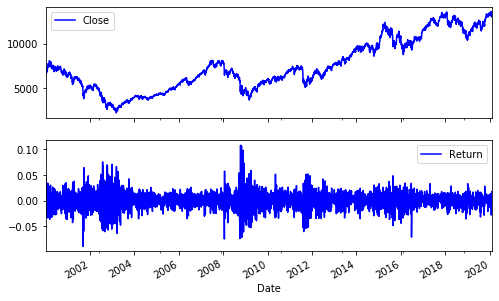

In [74]:
DAX[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

While volatility is something of particular importance for options traders, (technical)
stock traders might be more interested in moving averages, or so-called trends. A mov‐
ing average is easily calculated with the rolling_mean function of pandas (there are
other “rolling” functions as well, like rolling_max, rolling_min, and rolling_corr):

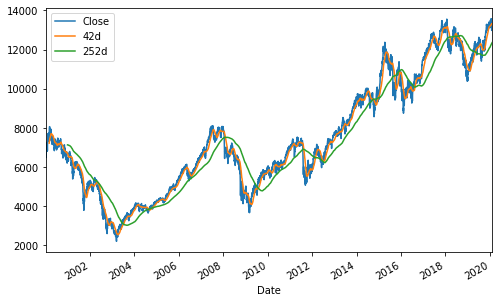

In [77]:
# A typical stock price chart with the two trends included 
DAX['42d'] = DAX['Close'].rolling(42).mean()
DAX['252d'] = DAX['Close'].rolling(252).mean()
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5))

Returning to the more options trader-like perspective, the moving historical standard
deviation of the log returns—i.e. the moving historical volatility—might be more of
interest:

In [78]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std() * math.sqrt(252)
# moving annual volatility

Figure 6-6 further supports the hypothesis of the leverage effect by clearly showing that
the historical moving volatility tends to increase when markets come down, and to
decrease when they rise:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1289f9050>,
      dtype=object)

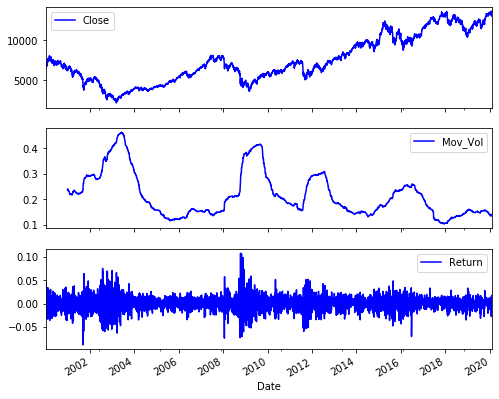

In [79]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',figsize=(8, 7))

## High-Frequency Data

This brief section illustrates how to cope with tick data instead of daily financial
data. To begin with, a couple of imports:

In [140]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline
import pytz

We want to download, combine, and analyze a week’s worth of tick data for the Apple Inc. stock, a quite actively traded name. Let us start with the dates of interest:

In [141]:
bae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9727 entries, 0 to 9726
Data columns (total 11 columns):
Local time        9727 non-null object
Ask               9727 non-null float64
Bid               9727 non-null float64
AskVolume         9727 non-null float64
BidVolume         9727 non-null float64
Log_Ret_Ask       9726 non-null float64
Volatility_Ask    8210 non-null float64
Log_Ret_Bid       9726 non-null float64
Volatility_Bid    8210 non-null float64
Ask_trend         9726 non-null float64
Bid_trend         9726 non-null float64
dtypes: float64(10), object(1)
memory usage: 836.0+ KB


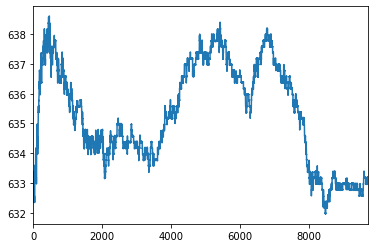

In [142]:
bae['Bid'].plot()

Over the course of a single trading day when markets are open, there is of course usually
a high activity level.

In [144]:
bae['Local time'] = pd.to_datetime(bae['Local time'], infer_datetime_format=True) 

In [145]:
bae.index = bae['Local time']

In [146]:
bae.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9727 entries, 2020-01-27 03:00:34.690000+05:00 to 2020-01-27 11:29:59.984000+05:00
Data columns (total 11 columns):
Local time        9727 non-null datetime64[ns, pytz.FixedOffset(300)]
Ask               9727 non-null float64
Bid               9727 non-null float64
AskVolume         9727 non-null float64
BidVolume         9727 non-null float64
Log_Ret_Ask       9726 non-null float64
Volatility_Ask    8210 non-null float64
Log_Ret_Bid       9726 non-null float64
Volatility_Bid    8210 non-null float64
Ask_trend         9726 non-null float64
Bid_trend         9726 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(300)](1), float64(10)
memory usage: 911.9 KB


In [147]:
bae.index

DatetimeIndex(['2020-01-27 03:00:34.690000+05:00',
               '2020-01-27 03:01:01.029000+05:00',
               '2020-01-27 03:01:01.324000+05:00',
               '2020-01-27 03:01:01.374000+05:00',
               '2020-01-27 03:01:03.546000+05:00',
               '2020-01-27 03:01:04.617000+05:00',
               '2020-01-27 03:01:15.059000+05:00',
               '2020-01-27 03:01:21.213000+05:00',
               '2020-01-27 03:01:21.264000+05:00',
               '2020-01-27 03:01:31.298000+05:00',
               ...
               '2020-01-27 11:29:58.213000+05:00',
               '2020-01-27 11:29:58.312000+05:00',
               '2020-01-27 11:29:58.413000+05:00',
               '2020-01-27 11:29:58.520000+05:00',
               '2020-01-27 11:29:59.285000+05:00',
               '2020-01-27 11:29:59.336000+05:00',
               '2020-01-27 11:29:59.708000+05:00',
               '2020-01-27 11:29:59.759000+05:00',
               '2020-01-27 11:29:59.882000+05:00',
            

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129fd5dd0>,
      dtype=object)

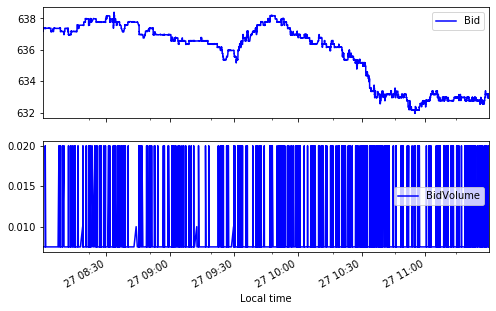

In [152]:
utc=pytz.UTC

to_plot = bae[['Bid', 'BidVolume']][(bae.index > dt.datetime(2020, 1, 27, 3, 0).replace(tzinfo=utc))
& (bae.index < dt.datetime(2020, 1, 27, 11, 30).replace(tzinfo=utc))]
# adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5))

Not sure if the bottom chart looks that way because there's just lots of trading at equal times or if there's some difference between bid volume and depth that I'm not familiar with.

Usually, financial tick data series lead to a DatetimeIndex that is highly irregular. In other words, time intervals between two observation points are highly heterogeneous. Against this background, a resampling of such data sets might sometimes be useful or even in order depending on the task at hand. pandas provides a method for this purpose
for the DataFrame object. In what follows, we simply take the mean for the resampling procedure; this might be consistent for some columns (e.g., “bid”) but not for others (e.g., “bdepth”):


In [155]:
bae_reset = bae[['Ask', 'Bid', 'AskVolume', 'BidVolume']]
bae_resam = bae_reset.resample(rule='5min').mean()
np.round(bae_resam.head(), 2)

,Ask,Bid,AskVolume,BidVolume
Local time,,,,
2020-01-27 03:00:00+05:00,634.49,633.16,0.01,0.01
2020-01-27 03:05:00+05:00,636.31,635.34,0.01,0.01
2020-01-27 03:10:00+05:00,637.52,636.66,0.01,0.01
2020-01-27 03:15:00+05:00,638.17,637.49,0.01,0.01
2020-01-27 03:20:00+05:00,638.51,637.78,0.01,0.01


The resulting plot in Figure 6-13 looks a bit smoother. Here, we have also filled empty
time intervals with the most recent available values (before the empty time interval):

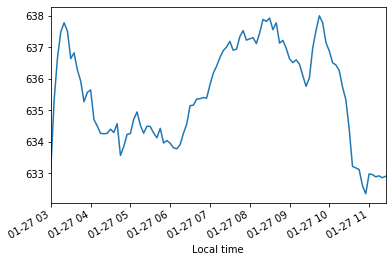

In [156]:
bae_resam['Bid'].fillna(method='ffill').plot()

Financial time series data is one of the most common and important forms of data in finance. The library pandas is generally the tool of choice when it comes to working with such data sets. Modeled after the data.frame class of R, the pandas DataFrame class provides a wealth of attributes and methods to attack almost any kind of (financial) analytics problem you might face. 

We are now pretty well equipped to attack real-world data and see how the normality
assumption does beyond the financial laboratory. We are going to analyze four historical
time series: two stock indices (the German DAX index and the American S&P 500 index)
and two stocks (Yahoo! Inc. and Microsoft Inc.). 

# 2. Python for Finance Second Edition by Yuxing Yan

Sometimes, we need to convert daily returns to monthly or annual ones. 
</br> 
</br> 
Here is our procedure. 
</br> 
</br> 
- First, we estimate the daily log returns. 
- We then take a summation of all daily log returns within each month to find out the corresponding monthly log
returns. 
- The final step is to convert a log monthly return to a monthly percentage return. 

#### Python for high-frequency data

The following program can be used to retrieve high-frequency data from
Google Finance:
</br>
</br>
Spread estimated based on high-frequency data: 

In [173]:
# Spread = Ask - Bid
# Ask also called offer...
bae['Spread'] = bae['Ask']-bae['Bid']

To find the mean spread and the mean relative spread, we have the following code.
The complete program is given as follows:

In [175]:
import scipy as sp
spread=sp.mean(bae['Ask']-bae['Bid'])
rel_spread=sp.mean(2*(bae['Ask']-bae['Bid'])/(bae['Ask']-bae['Bid']))
print(round(spread,5) )
print(round(rel_spread,5) )

0.487
2.0


# 3. Mastering Python for Finance 